# Churn Prediction☎️📊🔖📉

In this notebook:

- EDA for Iranian Churn Dataset
- Grid Search for hyperparameter tuning with cross-val&hold-out methods
- Decision Tree
- Naive Bayes
- SVM
- Neural Networks
- Bagging ensemble method
- Boosting ensemble method

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import time

In [2]:
df=pd.read_csv('../input/customer-churn/Customer Churn.csv')
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,649.7820,122.1980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,235.0890,76.1210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,252.2880,78.0320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,969.8760,157.7640,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  FN                       3150 non-null   float64
 14  FP                      

In [4]:
#rename columns
df=df.rename(columns={"Call  Failure": "call_failure", "Complains": "complains", "Subscription  Length": "subs_len", "Charge  Amount": "charge_amount",
                   "Seconds of Use": "total_sec_calls", "Frequency of use": "total_num_calls", "Frequency of SMS": "total_num_sms", "Distinct Called Numbers": "distinct_call_nums",
                   "Age Group": "age_group", "Tariff Plan": "tariff_plan", "Status": "status", "Age": "age", "Customer Value": "customer_value"})

In [5]:
df

,call_failure,complains,subs_len,charge_amount,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,age_group,tariff_plan,status,age,customer_value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,649.7820,122.1980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,235.0890,76.1210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,252.2880,78.0320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,969.8760,157.7640,0


In [6]:
#see how many unique values for each col
df.nunique()

call_failure            37
complains                2
subs_len                45
charge_amount           11
total_sec_calls       1756
total_num_calls        242
total_num_sms          405
distinct_call_nums      92
age_group                5
tariff_plan              2
status                   2
age                      5
customer_value        2654
FN                    2654
FP                    2195
Churn                    2
dtype: int64

In [7]:
#there is no Nan values
df.isnull().sum()

call_failure          0
complains             0
subs_len              0
charge_amount         0
total_sec_calls       0
total_num_calls       0
total_num_sms         0
distinct_call_nums    0
age_group             0
tariff_plan           0
status                0
age                   0
customer_value        0
FN                    0
FP                    0
Churn                 0
dtype: int64

# EDA

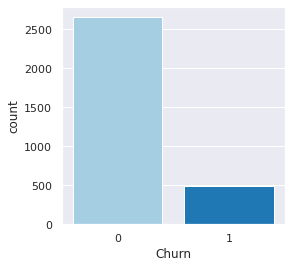

In [8]:
#see target class is imbalanced

sns.set_style("dark")
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(x="Churn", data=df, palette=sns.color_palette("Paired", 7), saturation=10)

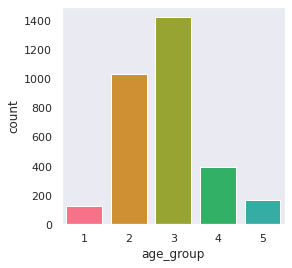

In [9]:
sns.set_style("dark")
sns.countplot(x="age_group", data=df, palette=sns.color_palette("husl", 8), saturation=10)

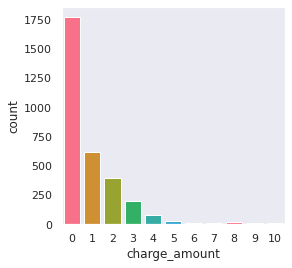

In [10]:
sns.set_style("dark")
sns.countplot(x="charge_amount", data=df, palette=sns.color_palette("husl", 8), saturation=10)

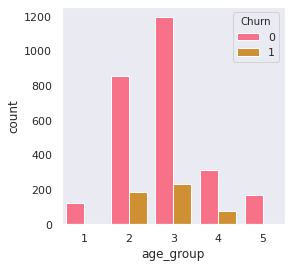

In [11]:
sns.set_style("dark")
sns.countplot(x="age_group", data=df, palette=sns.color_palette("husl", 8), saturation=10, hue="Churn")

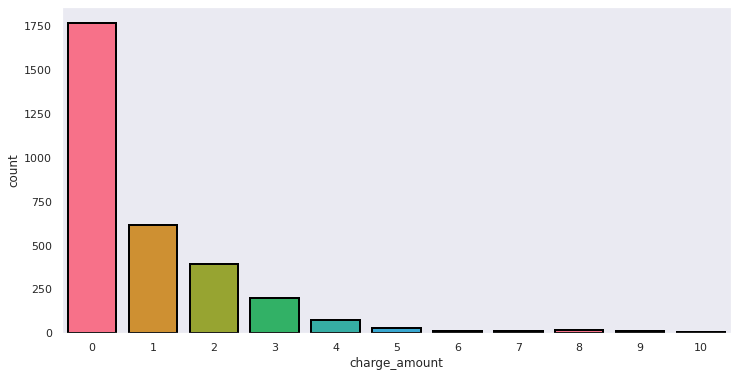

In [12]:
sns.set(rc={"font.style":"normal",
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(12.0, 6),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

sns.set(style="white",font_scale=1)


sns.set_style("dark")
sns.countplot(x="charge_amount", data=df, palette=sns.color_palette("husl", 8), 
              saturation=10, edgecolor=(0,0,0), linewidth=2)

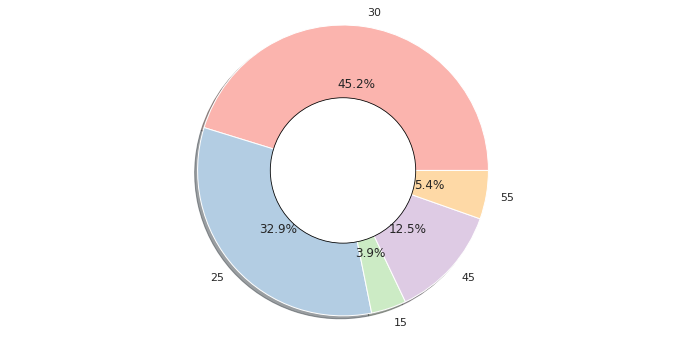

In [13]:
# library
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Pastel1_7

# create data
names=list(df["age"].unique())
sizes=[df["age"].value_counts()[unique_class]*100/len(df["age"]) for unique_class in names]
colors = Pastel1_7.hex_colors
explode = (0, 0, 0, 0, 0)  # explode a slice if required

plt.pie(sizes, explode=explode, labels=names, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0), 0.50, color='black', fc='white',linewidth=0.80)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

In [14]:
cat_feature_col=["complains", "charge_amount", "tariff_plan", "status", "age","Churn"]
for i in cat_feature_col:
    print(f"{i} : {df[i].unique()}")
    print(df[i].value_counts())
    print("-------------------------------------------")

complains : [0 1]
0    2909
1     241
Name: complains, dtype: int64
-------------------------------------------
charge_amount : [ 0  1  2  3  8  4  9  7  5 10  6]
0     1768
1      617
2      395
3      199
4       76
5       30
8       19
9       14
7       14
6       11
10       7
Name: charge_amount, dtype: int64
-------------------------------------------
tariff_plan : [1 2]
1    2905
2     245
Name: tariff_plan, dtype: int64
-------------------------------------------
status : [1 2]
1    2368
2     782
Name: status, dtype: int64
-------------------------------------------
age : [30 25 15 45 55]
30    1425
25    1037
45     395
55     170
15     123
Name: age, dtype: int64
-------------------------------------------
Churn : [0 1]
0    2655
1     495
Name: Churn, dtype: int64
-------------------------------------------


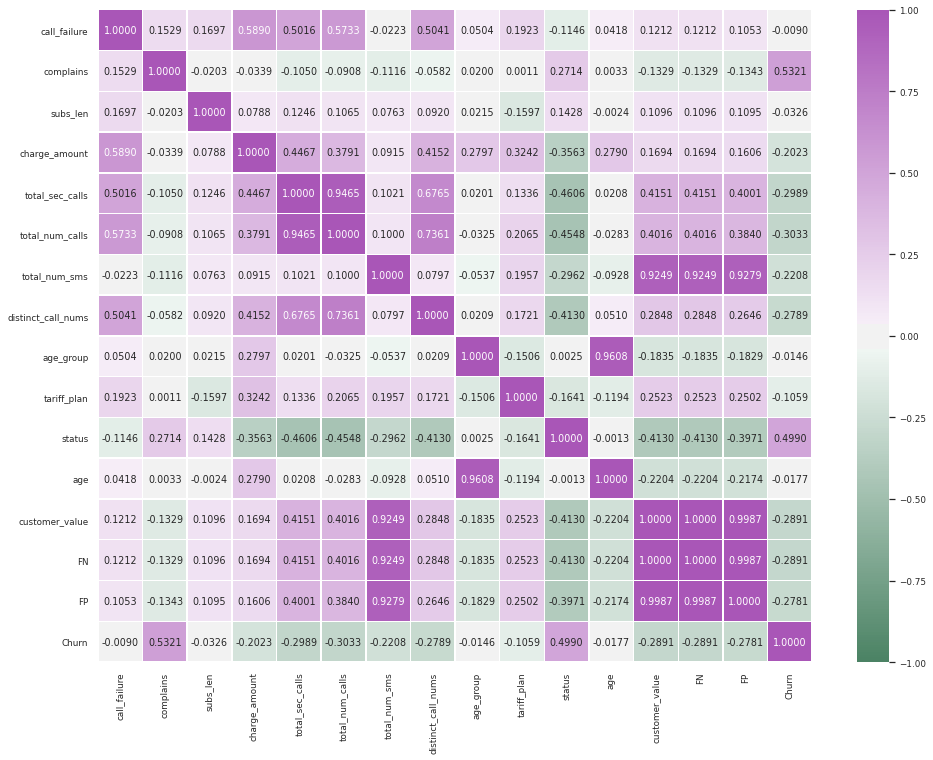

In [15]:
#heatmap for correlation coefficient

# calculate correlation
df_corr = df.corr()

# correlation matrix
sns.set(font_scale=0.8)
plt.figure(figsize=(16,12))
sns.heatmap(df_corr, annot=True, fmt=".4f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True))

#plt.yticks(rotation=0)
plt.show()

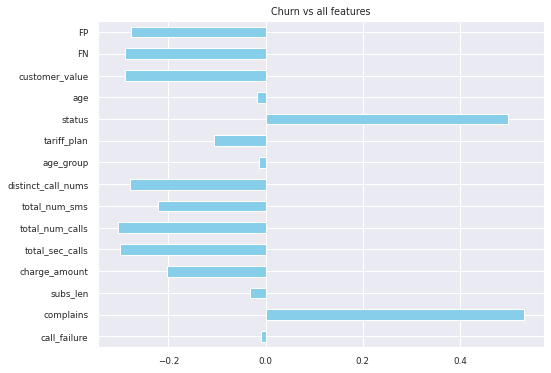

In [16]:
#feature importance using corr
df.drop('Churn', axis=1).corrwith(df.Churn).plot(kind='barh', figsize=(8, 6), color='skyblue', title="Churn vs all features")

In [17]:
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-1.1.1-py2.py3-none-any.whl size=12986 sha256=b3806776053e3ca7b0cb942fa58ba691faf636c4f7554330d1fe611dbda1543c
  Stored in directory: /root/.cache/pip/wheels/d0/1f/c4/e619fb20c9b10df8ddde15d583197edef8c2f27d7b1f29c633
Successfully built ppscore
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


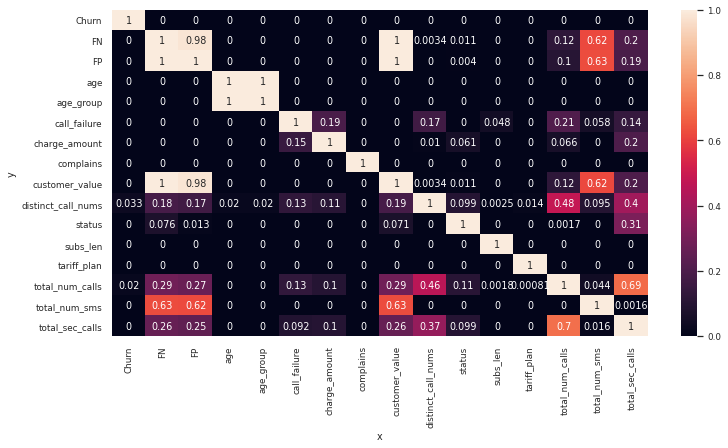

In [18]:
import seaborn as sns
import ppscore as pps

matrix_df = pps.matrix(df).pivot(columns='x', index='y',  values='ppscore')

sns.heatmap(matrix_df, annot=True)

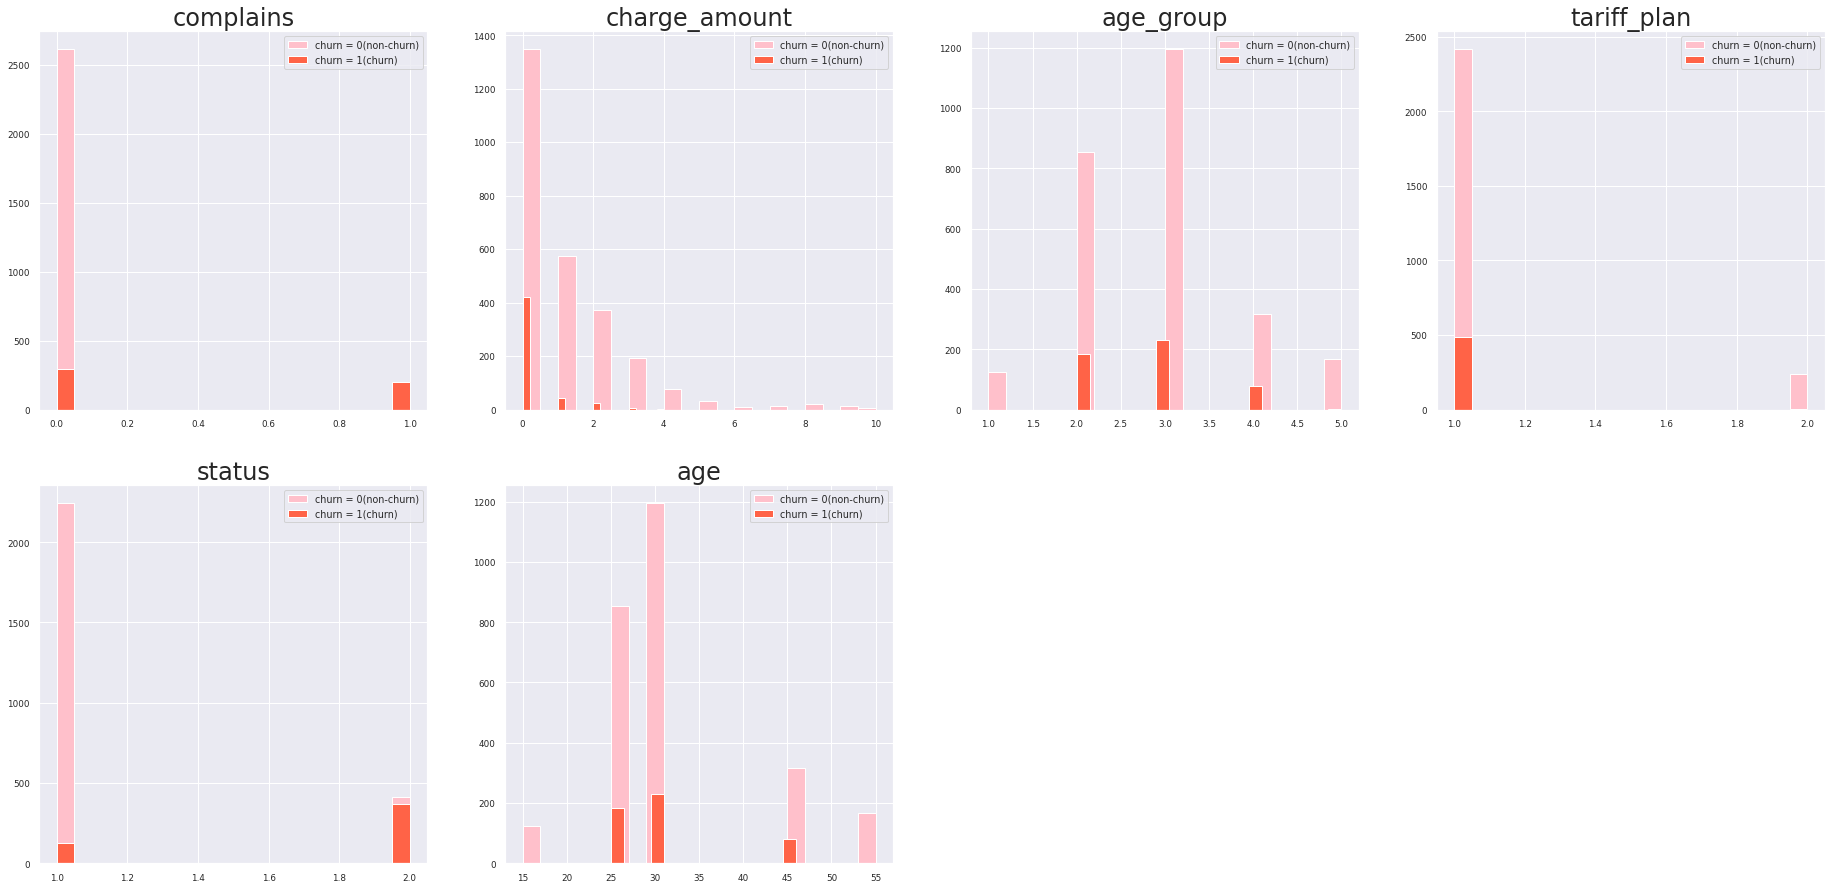

In [19]:
#for cat data distribution
import matplotlib

plt.figure(figsize=(32, 32))
matplotlib.rc('axes', titlesize=24)#cols size

cat_feature_col=["complains", "charge_amount", "age_group", "tariff_plan", "status", "age"]
for i, column in enumerate(cat_feature_col, 1):
    plt.subplot(4, 4, i)
    df[df["Churn"] == 0][column].hist(bins=20, color='pink', label='churn = 0(non-churn)', alpha=1)
    df[df["Churn"] == 1][column].hist(bins=20, color='tomato', label='churn = 1(churn)', alpha=1)
    plt.legend(fontsize='medium')
    plt.title(column)

In [20]:
#since age_group and age is highly correlated, we decide to del age_group
df=df.drop(columns=["age_group", "FN", "FP"])

In [21]:
df

,call_failure,complains,subs_len,charge_amount,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,tariff_plan,status,age,customer_value,Churn
0,8,0,38,0,4370,71,5,17,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,1,1,30,1077.640,0


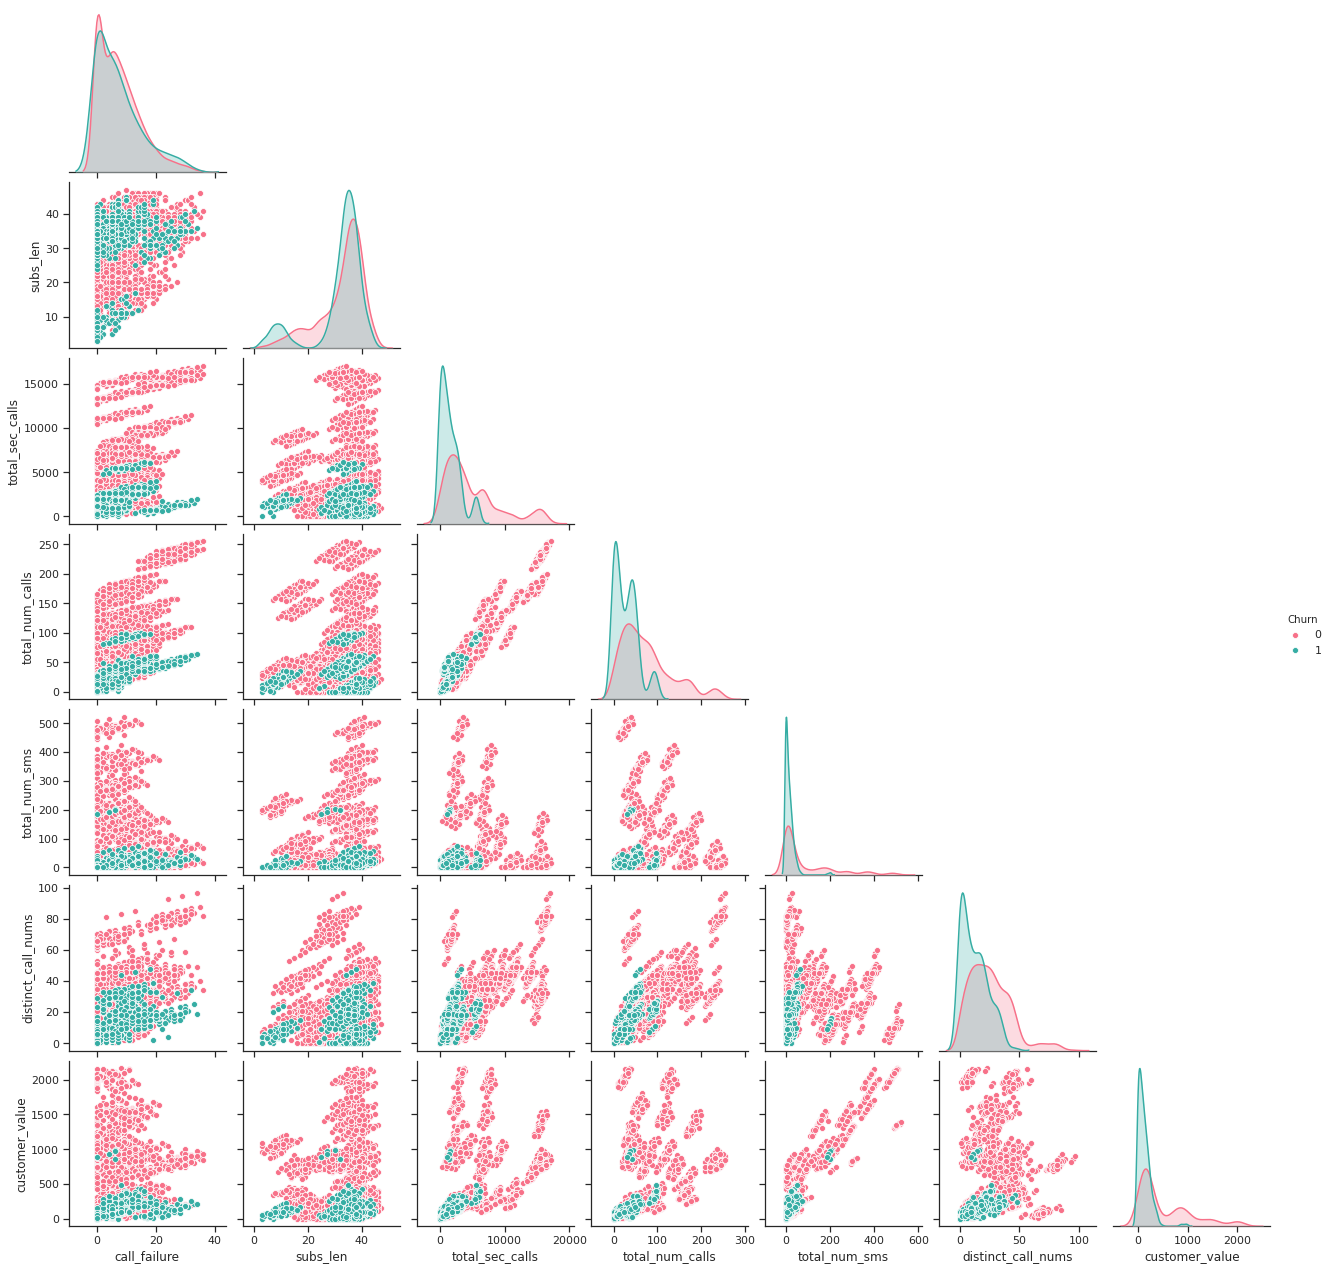

In [22]:
#for cont data scatterplot matrix
cont_feature_col=["call_failure", "subs_len", "total_sec_calls", "total_num_calls", "total_num_sms", "distinct_call_nums","customer_value"]

sns.set(style="ticks")

sns.pairplot(df[cont_feature_col + ['Churn']], hue='Churn', palette="husl", corner=True)

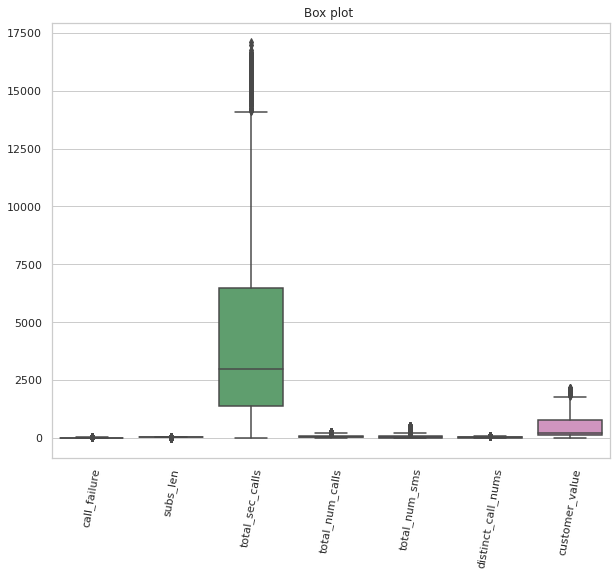

In [23]:
#outlier analysis using box-plot(continuos data can have outliers)

sns.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(10,8))
sns.boxplot(data=df[cont_feature_col])
plt.xticks(rotation=80)
plt.title("Box plot ")
plt.show()

In [24]:
df.describe()

,call_failure,complains,subs_len,charge_amount,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,tariff_plan,status,age,customer_value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [25]:
# find the IQR
q1 = df[cont_feature_col].quantile(.25)
q3 = df[cont_feature_col].quantile(.75)
IQR = q3-q1

outliers_df = np.logical_or((df[cont_feature_col] < (q1 - 1.5 * IQR)), (df[cont_feature_col] > (q3 + 1.5 * IQR))) 

outlier_list=[]
total_outlier=[]
for col in list(outliers_df.columns):
    try:
        total_outlier.append(outliers_df[col].value_counts()[True])
        outlier_list.append((outliers_df[col].value_counts()[True] / outliers_df[col].value_counts().sum()) * 100)
    except:
        outlier_list.append(0)
        total_outlier.append(0)
        
outlier_list

outlier_df=pd.DataFrame(zip(list(outliers_df.columns), total_outlier, outlier_list), columns=['name of the column', 'total', 'outlier(%)'])

#see totally how many outliers in cont features
outlier_df.set_index('name of the column', inplace=True)
#del outlier_df.index.name
outlier_df

,total,outlier(%)
name of the column,,
call_failure,47,1.492063
subs_len,282,8.952381
total_sec_calls,200,6.349206
total_num_calls,129,4.095238
total_num_sms,368,11.682540
distinct_call_nums,77,2.444444
customer_value,116,3.682540


In [26]:
outliers_df

,call_failure,subs_len,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,customer_value
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3145,False,False,False,False,False,False,False
3146,False,True,False,False,False,False,False
3147,False,False,False,False,False,False,False
3148,False,True,False,False,True,False,False


In [27]:
df_cont=df[cont_feature_col]
out_nan_df=df_cont[~outliers_df]
out_nan_df

,call_failure,subs_len,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,customer_value
0,8.0,38.0,4370.0,71.0,5.0,17.0,197.640
1,0.0,39.0,318.0,5.0,7.0,4.0,46.035
2,10.0,37.0,2453.0,60.0,NaN,24.0,1536.520
3,10.0,38.0,4198.0,66.0,1.0,35.0,240.020
4,3.0,38.0,2393.0,58.0,2.0,33.0,145.805
...,...,...,...,...,...,...,...
3145,21.0,19.0,6697.0,147.0,92.0,44.0,721.980
3146,17.0,NaN,9237.0,177.0,80.0,42.0,261.210
3147,13.0,18.0,3157.0,51.0,38.0,21.0,280.320
3148,7.0,NaN,4695.0,46.0,NaN,12.0,1077.640


In [28]:
for col in cont_feature_col:
  #qq=out_nan_df.dropna()
  col_mean=df[col].mean() #calculate mean for each col
  out_nan_df[col]=out_nan_df[col].fillna(col_mean) #first convert outliers to Nan values then fill Nan's with col mean
  #df[cont_feature_col]=df_cont

In [29]:
out_nan_df

,call_failure,subs_len,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,customer_value
0,8.0,38.000000,4370.0,71.0,5.000000,17.0,197.640
1,0.0,39.000000,318.0,5.0,7.000000,4.0,46.035
2,10.0,37.000000,2453.0,60.0,73.174921,24.0,1536.520
3,10.0,38.000000,4198.0,66.0,1.000000,35.0,240.020
4,3.0,38.000000,2393.0,58.0,2.000000,33.0,145.805
...,...,...,...,...,...,...,...
3145,21.0,19.000000,6697.0,147.0,92.000000,44.0,721.980
3146,17.0,32.541905,9237.0,177.0,80.000000,42.0,261.210
3147,13.0,18.000000,3157.0,51.0,38.000000,21.0,280.320
3148,7.0,32.541905,4695.0,46.0,73.174921,12.0,1077.640


In [30]:
deneme=df.drop(columns=["call_failure", "subs_len", "total_sec_calls", "total_num_calls", "total_num_sms", "distinct_call_nums", "customer_value"])

In [31]:
#concat cat_df and clear out of outliers cont_df

df=pd.concat([out_nan_df, deneme], axis=1)

In [32]:
df

,call_failure,subs_len,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,customer_value,complains,charge_amount,tariff_plan,status,age,Churn
0,8.0,38.000000,4370.0,71.0,5.000000,17.0,197.640,0,0,1,1,30,0
1,0.0,39.000000,318.0,5.0,7.000000,4.0,46.035,0,0,1,2,25,0
2,10.0,37.000000,2453.0,60.0,73.174921,24.0,1536.520,0,0,1,1,30,0
3,10.0,38.000000,4198.0,66.0,1.000000,35.0,240.020,0,0,1,1,15,0
4,3.0,38.000000,2393.0,58.0,2.000000,33.0,145.805,0,0,1,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21.0,19.000000,6697.0,147.0,92.000000,44.0,721.980,0,2,2,1,25,0
3146,17.0,32.541905,9237.0,177.0,80.000000,42.0,261.210,0,1,1,1,55,0
3147,13.0,18.000000,3157.0,51.0,38.000000,21.0,280.320,0,4,1,1,30,0
3148,7.0,32.541905,4695.0,46.0,73.174921,12.0,1077.640,0,2,1,1,30,0


# CLASSIFICATION

In [33]:
#import sklearn methods
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, CategoricalNB
from sklearn.svm import LinearSVC,SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
import sys 
import os

In [34]:
# split df to X and Y
y = df.loc[:, 'Churn'].values
X = df.drop('Churn', axis=1)

# split data into 80-20 for training set / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

# cross-validation with 5 splits
cv = StratifiedShuffleSplit(n_splits=5, random_state = 88)

#hold-out
hold_out=StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state = 88)

In [35]:
X

,call_failure,subs_len,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,customer_value,complains,charge_amount,tariff_plan,status,age
0,8.0,38.000000,4370.0,71.0,5.000000,17.0,197.640,0,0,1,1,30
1,0.0,39.000000,318.0,5.0,7.000000,4.0,46.035,0,0,1,2,25
2,10.0,37.000000,2453.0,60.0,73.174921,24.0,1536.520,0,0,1,1,30
3,10.0,38.000000,4198.0,66.0,1.000000,35.0,240.020,0,0,1,1,15
4,3.0,38.000000,2393.0,58.0,2.000000,33.0,145.805,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21.0,19.000000,6697.0,147.0,92.000000,44.0,721.980,0,2,2,1,25
3146,17.0,32.541905,9237.0,177.0,80.000000,42.0,261.210,0,1,1,1,55
3147,13.0,18.000000,3157.0,51.0,38.000000,21.0,280.320,0,4,1,1,30
3148,7.0,32.541905,4695.0,46.0,73.174921,12.0,1077.640,0,2,1,1,30


In [36]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [37]:
print("X_train size is", len(X_train))
print("y_train size is", len(y_train))
print("--------------------")
print("X_test size is", len(X_test))
print("y_test size is", len(y_test))

X_train size is 2520
y_train size is 2520
--------------------
X_test size is 630
y_test size is 630


# Normalization

In [38]:
#normalization(make all values bet. 0-1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_normalized_arr=scaler.transform(X_train)
X_train_normalized_df=pd.DataFrame(X_train_normalized_arr, columns=list(X.columns))

X_test_normalized_arr=scaler.transform(X_test)
X_test_normalized_df=pd.DataFrame(X_test_normalized_arr, columns=list(X.columns))

In [39]:
X_train_normalized_df

,call_failure,subs_len,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,customer_value,complains,charge_amount,tariff_plan,status,age
0,0.000000,0.793103,0.006606,0.005155,0.048077,0.085714,0.027760,0.0,0.0,0.0,1.0,0.250
1,0.321429,0.758621,0.144410,0.175258,0.057692,0.142857,0.046055,0.0,0.2,0.0,0.0,0.750
2,0.928571,0.586207,0.317691,0.358045,0.048077,0.335855,0.441388,0.0,0.4,0.0,0.0,0.250
3,0.357143,0.689655,0.298196,0.340206,0.004808,0.500000,0.135341,0.0,0.0,0.0,0.0,0.000
4,0.000000,0.586207,0.196051,0.335052,0.000000,0.371429,0.071683,0.0,0.0,0.0,0.0,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...
2515,0.178571,0.586207,0.021665,0.030928,0.033654,0.028571,0.025654,0.0,0.0,0.0,1.0,0.250
2516,0.000000,0.501445,0.269214,0.154639,0.932692,0.328571,0.523728,0.0,0.0,0.0,0.0,0.375
2517,0.964286,0.517241,0.110456,0.293814,0.177885,0.457143,0.119812,1.0,0.0,0.0,1.0,0.375
2518,0.250000,0.501445,0.223611,0.252577,0.216346,0.457143,0.173606,0.0,0.4,0.0,0.0,0.375


In [40]:
X_test_normalized_df

,call_failure,subs_len,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,customer_value,complains,charge_amount,tariff_plan,status,age
0,0.000000,0.501445,0.138372,0.149485,0.014423,0.028571,0.051358,0.0,0.0,0.0,0.0,0.375
1,0.821429,0.344828,0.317691,0.358045,0.000000,0.335855,0.409162,0.0,0.3,0.0,0.0,0.250
2,0.357143,0.241379,0.070678,0.149485,0.115385,0.285714,0.086882,0.0,0.0,0.0,1.0,0.250
3,0.272426,0.655172,0.317691,0.358045,0.072115,0.335855,0.458846,1.0,0.4,0.0,0.0,0.250
4,0.000000,0.448276,0.044609,0.005155,0.004808,0.042857,0.010277,0.0,0.0,0.0,1.0,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...
625,0.000000,0.379310,0.134110,0.226804,0.351803,0.228571,0.904141,0.0,0.0,0.0,0.0,0.250
626,0.535714,0.724138,0.195909,0.340206,0.351803,0.371429,0.889210,0.0,0.1,0.0,0.0,0.375
627,0.500000,0.172414,0.102998,0.185567,0.076923,0.157143,0.078305,0.0,0.1,0.0,0.0,0.250
628,0.142857,0.620690,0.137306,0.247423,0.004808,0.214286,0.046937,0.0,0.0,0.0,1.0,0.375


In [41]:
print("X_train_normalized_df size is", len(X_train_normalized_df))
print("----------------------------------")
print("X_test_normalized_df size is", len(X_test_normalized_df))

X_train_normalized_df size is 2520
----------------------------------
X_test_normalized_df size is 630


# feature importances

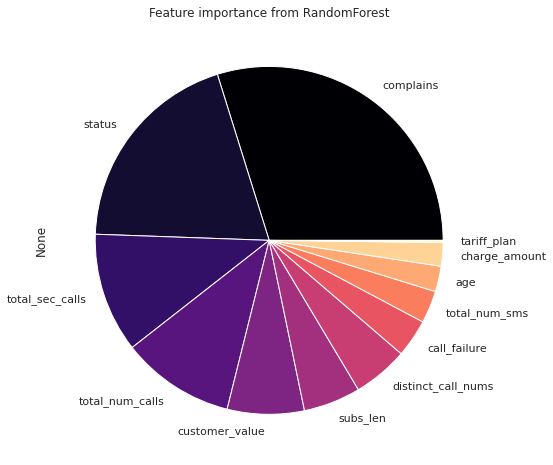

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500, max_depth=5)
rf.fit(X_train_normalized_df, y_train)
rf_y_pred = rf.predict(X_test_normalized_df)

pd.Series(rf.feature_importances_, index = X_train_normalized_df.columns).nlargest(15).plot(kind = 'pie',
                                                                               figsize = (8, 8),
                                                                              title = 'Feature importance from RandomForest', colormap='magma')

Here, our display test scores method

In [43]:
# display test scores and return result string and indexes of false samples
def display_test_scores(test, pred):
    str_out = "\n"
    str_out += ("#####  TEST SCORES  #####\n--------------------")
    str_out += ("\n")

    #print accuracy
    accuracy = accuracy_score(test, pred)
    str_out += ("ACCURACY: {:.4f}\n".format(accuracy))
    str_out += ("\n")

    #print AUC score
    auc = roc_auc_score(test, pred)
    str_out += ("AUC: {:.4f}\n".format(auc))
    str_out += ("\n")

    #print confusion matrix
    str_out += ("CONFUSION MATRIX:\n--------------------\n")
    conf_mat = confusion_matrix(test, pred)
    str_out += ("{}".format(conf_mat))
    str_out += ("\n")
    str_out += ("\n--------------------\n")

    #print classification report
    str_out += ("{}".format(classification_report(test, pred)))
    
    false_indexes = np.where(test != pred)
    return str_out, false_indexes

# **Classifier #1: Decision Tree**

In [44]:
# decision tree with "gini"
dt_1 = DecisionTreeClassifier(random_state = 0, criterion="gini")

# parameters 
parameters = {
                "splitter": ["best","random"],
                "class_weight": [None, "balanced"],
                "max_depth": [9, 11, 13, 15, 17, None]
                }

start_time=time.time()##

# grid search for parameters
grid_1 = GridSearchCV(estimator=dt_1, param_grid=parameters, cv=cv, n_jobs=-1)
grid_1.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_1.best_params_, grid_1.best_score_))

################################################
# detailed dataframe of gridsearch

#detailed_grid_results = pd.DataFrame(grid.cv_results_)
#detailed_grid_results


################################################

# prediction results
y_pred = grid_1.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test cv (DT-gini): ",end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'class_weight': None, 'max_depth': 17, 'splitter': 'best'} with a score of 0.9452

Run time for train&test cv (DT-gini):  3.008037805557251

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9349

AUC: 0.8833

CONFUSION MATRIX:
--------------------
[[509  22]
 [ 19  80]]

--------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       531
           1       0.78      0.81      0.80        99

    accuracy                           0.93       630
   macro avg       0.87      0.88      0.88       630
weighted avg       0.94      0.93      0.94       630



*### hold_out DT1*

In [45]:
start_time=time.time()##

# grid search for parameters for hold_out
grid_1_h = GridSearchCV(estimator=dt_1, param_grid=parameters, cv=hold_out, n_jobs=-1)
grid_1_h.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_1_h.best_params_, grid_1_h.best_score_))

#########################################

# prediction results
y_pred = grid_1_h.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test hold_out (DT-gini): ",end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)


The best parameters are {'class_weight': None, 'max_depth': 17, 'splitter': 'best'} with a score of 0.9413

Run time for train&test hold_out (DT-gini):  0.17365503311157227

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9349

AUC: 0.8833

CONFUSION MATRIX:
--------------------
[[509  22]
 [ 19  80]]

--------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       531
           1       0.78      0.81      0.80        99

    accuracy                           0.93       630
   macro avg       0.87      0.88      0.88       630
weighted avg       0.94      0.93      0.94       630



# **Classifier #2: Decision Tree**

In [46]:
# decision tree with "entropy" gain_ratio
dt_2 = DecisionTreeClassifier(random_state = 0, criterion="entropy")

# parameters 
parameters = {
                "splitter": ["best","random"],
                "class_weight": [None, "balanced"],
                "max_depth": [11, 13, 15, 17, 19, 21, None]
                }

start_time=time.time()##

# grid search for parameters
grid_2 = GridSearchCV(estimator=dt_2, param_grid=parameters, cv=cv, n_jobs=-1)
grid_2.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_2.best_params_, grid_2.best_score_))

########################################

# prediction results
y_pred = grid_2.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test cv (DT-gain ratio): ",end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'class_weight': 'balanced', 'max_depth': 15, 'splitter': 'best'} with a score of 0.9460

Run time for train&test cv (DT-gain ratio):  0.8301875591278076

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9460

AUC: 0.9064

CONFUSION MATRIX:
--------------------
[[512  19]
 [ 15  84]]

--------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       531
           1       0.82      0.85      0.83        99

    accuracy                           0.95       630
   macro avg       0.89      0.91      0.90       630
weighted avg       0.95      0.95      0.95       630



*### hold_out DT2*

In [47]:
start_time=time.time()##

# grid search for parameters for hold_out
grid_2_h = GridSearchCV(estimator=dt_2, param_grid=parameters, cv=hold_out, n_jobs=-1)
grid_2_h.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_2_h.best_params_, grid_2_h.best_score_))

#####################################

# prediction results
y_pred = grid_2_h.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test hold_out (DT-gain ratio): ",end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'class_weight': 'balanced', 'max_depth': 17, 'splitter': 'best'} with a score of 0.9429

Run time for train&test hold_out (DT-gain ratio):  0.2126624584197998

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9444

AUC: 0.9013

CONFUSION MATRIX:
--------------------
[[512  19]
 [ 16  83]]

--------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       531
           1       0.81      0.84      0.83        99

    accuracy                           0.94       630
   macro avg       0.89      0.90      0.90       630
weighted avg       0.95      0.94      0.94       630



# **Classifier #3: Naive Bayes**

In [48]:
# Naive-Bayes with different approaches
nb_list = [GaussianNB(), MultinomialNB(), ComplementNB()]

for nb in nb_list:
    print("*********", str(nb), "**********")
    # parameters 
    parameters = {}

    start_time=time.time()##
    # grid search for parameters
    grid_3 = GridSearchCV(estimator=nb, param_grid=parameters, cv=cv, n_jobs=-1)
    grid_3.fit(X_train_normalized_df, y_train)

    # print best scores
    print("The best parameters are %s with a score of %0.4f\n"
          % (grid_3.best_params_, grid_3.best_score_))

    # prediction results
    y_ord_pred = grid_3.predict(X_test_normalized_df)
    
    end_time=time.time()##
    print("\nRun time for train&test cv{}: ".format(str(nb)), end_time-start_time)

    # print accuracy metrics
    results, false = display_test_scores(y_test, y_pred)
    print("\n>>>>>>>>><<<<<<<<<<>>>>>>>>>>><<<<<<<<<<<<<>>>>>>>>><<<<<<<<\n")
    print(results)
    

********* GaussianNB() **********
The best parameters are {} with a score of 0.7873


Run time for train&test cvGaussianNB():  0.053544044494628906

>>>>>>>>><<<<<<<<<<>>>>>>>>>>><<<<<<<<<<<<<>>>>>>>>><<<<<<<<


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9444

AUC: 0.9013

CONFUSION MATRIX:
--------------------
[[512  19]
 [ 16  83]]

--------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       531
           1       0.81      0.84      0.83        99

    accuracy                           0.94       630
   macro avg       0.89      0.90      0.90       630
weighted avg       0.95      0.94      0.94       630

********* MultinomialNB() **********
The best parameters are {} with a score of 0.8889


Run time for train&test cvMultinomialNB():  0.0676724910736084

>>>>>>>>><<<<<<<<<<>>>>>>>>>>><<<<<<<<<<<<<>>>>>>>>><<<<<<<<


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9444

AUC: 0.9013

CONFU

*### hold_out NB*

In [49]:
for nb in nb_list:
    print("*********", str(nb), "**********")
    # parameters 
    parameters = {}

    start_time=time.time()##
    # grid search for parameters
    grid_3_h = GridSearchCV(estimator=nb, param_grid=parameters, cv=hold_out, n_jobs=-1)
    grid_3_h.fit(X_train_normalized_df, y_train)

    # print best scores
    print("The best parameters are %s with a score of %0.4f\n"
          % (grid_3_h.best_params_, grid_3_h.best_score_))

    # prediction results
    y_ord_pred = grid_3_h.predict(X_test_normalized_df)
    
    end_time=time.time()##
    print("\nRun time for train&test hold_out{}: ".format(str(nb)), end_time-start_time)

    # print accuracy metrics
    results, false = display_test_scores(y_test, y_pred)
    print("\n>>>>>>>>><<<<<<<<<<>>>>>>>>>>><<<<<<<<<<<<<>>>>>>>>><<<<<<<<\n")
    print(results)
    

********* GaussianNB() **********
The best parameters are {} with a score of 0.7667


Run time for train&test hold_outGaussianNB():  0.023172378540039062

>>>>>>>>><<<<<<<<<<>>>>>>>>>>><<<<<<<<<<<<<>>>>>>>>><<<<<<<<


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9444

AUC: 0.9013

CONFUSION MATRIX:
--------------------
[[512  19]
 [ 16  83]]

--------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       531
           1       0.81      0.84      0.83        99

    accuracy                           0.94       630
   macro avg       0.89      0.90      0.90       630
weighted avg       0.95      0.94      0.94       630

********* MultinomialNB() **********
The best parameters are {} with a score of 0.8857


Run time for train&test hold_outMultinomialNB():  0.023481130599975586

>>>>>>>>><<<<<<<<<<>>>>>>>>>>><<<<<<<<<<<<<>>>>>>>>><<<<<<<<


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9444

AUC:

# Classifier #4: ANN - 1 layer

In [50]:
# NN with 1 layer
ann_1 = MLPClassifier(tol=1e-5, random_state=0, solver='adam', activation='tanh', max_iter=1000, batch_size=256)

parameters = {
                'hidden_layer_sizes': [(10,),(50,),(100,)],
                'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
            }


start_time=time.time()##
# grid search for parameters
grid_4 = GridSearchCV(estimator=ann_1, param_grid=parameters, cv=cv, n_jobs=-1)
grid_4.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid_4.best_params_, grid_4.best_score_))

###################################

# prediction results
y_pred = grid_4.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test cv NN-1 layer: ", end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'alpha': 0.0001, 'hidden_layer_sizes': (100,)} with a score of 0.9286


Run time for train&test cv NN-1 layer:  263.7669417858124

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9381

AUC: 0.8441

CONFUSION MATRIX:
--------------------
[[521  10]
 [ 29  70]]

--------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       531
           1       0.88      0.71      0.78        99

    accuracy                           0.94       630
   macro avg       0.91      0.84      0.87       630
weighted avg       0.94      0.94      0.94       630



/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


*### hold_out NN-1*

In [51]:
start_time=time.time()##

# grid search for parameters for hold_out
grid_4_h = GridSearchCV(estimator=ann_1, param_grid=parameters, cv=hold_out, n_jobs=-1)
grid_4_h.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_4_h.best_params_, grid_4_h.best_score_))

####################################

# prediction results
y_pred = grid_4_h.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test hold_out NN-1 layer: ", end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)


The best parameters are {'alpha': 0.0001, 'hidden_layer_sizes': (50,)} with a score of 0.9159

Run time for train&test hold_out NN-1 layer:  41.15490365028381

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9397

AUC: 0.8574

CONFUSION MATRIX:
--------------------
[[519  12]
 [ 26  73]]

--------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       531
           1       0.86      0.74      0.79        99

    accuracy                           0.94       630
   macro avg       0.91      0.86      0.88       630
weighted avg       0.94      0.94      0.94       630



/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Classifier #5: ANN - 2 layer

In [52]:
# NN with 2 layers
nn_2 = MLPClassifier(tol=1e-5, random_state=0, solver='adam', activation='tanh', max_iter=1000, batch_size=256)


parameters = {
                'hidden_layer_sizes': [(10, 10),(50, 50),(100, 100)],
                'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
            }

start_time=time.time()##
# grid search for parameters
grid_5 = GridSearchCV(estimator=nn_2, param_grid=parameters, cv=cv, n_jobs=-1)
grid_5.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid_5.best_params_, grid_5.best_score_))

############################

# prediction results
y_pred = grid_5.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test cv NN-2 layer: ", end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'alpha': 0.0001, 'hidden_layer_sizes': (50, 50)} with a score of 0.9532


Run time for train&test cv NN-2 layer:  317.8733580112457

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9619

AUC: 0.9404

CONFUSION MATRIX:
--------------------
[[516  15]
 [  9  90]]

--------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       531
           1       0.86      0.91      0.88        99

    accuracy                           0.96       630
   macro avg       0.92      0.94      0.93       630
weighted avg       0.96      0.96      0.96       630



*### hold_out NN-2*

In [53]:
start_time=time.time()##

# grid search for parameters for hold_out
grid_5_h = GridSearchCV(estimator=nn_2, param_grid=parameters, cv=hold_out, n_jobs=-1)
grid_5_h.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_5_h.best_params_, grid_5_h.best_score_))

####################################

# prediction results
y_pred = grid_5_h.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test hold_out NN-2 layer: ", end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)


The best parameters are {'alpha': 0.0001, 'hidden_layer_sizes': (50, 50)} with a score of 0.9381

Run time for train&test hold_out NN-2 layer:  68.07923078536987

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9619

AUC: 0.9404

CONFUSION MATRIX:
--------------------
[[516  15]
 [  9  90]]

--------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       531
           1       0.86      0.91      0.88        99

    accuracy                           0.96       630
   macro avg       0.92      0.94      0.93       630
weighted avg       0.96      0.96      0.96       630



# **Classifier #6: SVM**

In [54]:
# SVM classifier
svm = SVC(tol=1e-5)

# parameters 
parameters = {
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                'max_iter': [100, 300, 800, 1000, 1200],
                'class_weight': [None, 'balanced']
            }

start_time=time.time()##

# grid search for parameters
grid_6 = GridSearchCV(estimator=svm, param_grid=parameters, cv=cv, n_jobs=-1)
grid_6.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid_6.best_params_, grid_6.best_score_))

# prediction results
y_pred = grid_6.predict(X_test_normalized_df)


end_time=time.time()##
print("\nRun time for train&test cv SVM : ", end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'C': 100, 'class_weight': None, 'kernel': 'rbf', 'max_iter': 800} with a score of 0.9532


Run time for train&test cv SVM :  39.64904856681824

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9587

AUC: 0.9221

CONFUSION MATRIX:
--------------------
[[518  13]
 [ 13  86]]

--------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       531
           1       0.87      0.87      0.87        99

    accuracy                           0.96       630
   macro avg       0.92      0.92      0.92       630
weighted avg       0.96      0.96      0.96       630



/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=800).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


*### hold_out SVM*

In [55]:
start_time=time.time()##

# grid search for parameters
grid_6_h = GridSearchCV(estimator=svm, param_grid=parameters, cv=hold_out, n_jobs=-1)
grid_6_h.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid_6_h.best_params_, grid_6_h.best_score_))

# prediction results
y_pred = grid_6_h.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test hold_out SVM : ", end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'C': 100, 'class_weight': None, 'kernel': 'rbf', 'max_iter': 800} with a score of 0.9365


Run time for train&test hold_out SVM :  7.739130735397339

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9587

AUC: 0.9221

CONFUSION MATRIX:
--------------------
[[518  13]
 [ 13  86]]

--------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       531
           1       0.87      0.87      0.87        99

    accuracy                           0.96       630
   macro avg       0.92      0.92      0.92       630
weighted avg       0.96      0.96      0.96       630



/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=800).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


# Classifier #7: Bagging

In [56]:
start_time=time.time()##

#generate subsamples by indices
indexes=X_train.index.values
rep = np.array([np.random.choice(indexes, len(indexes), replace = True) for _ in range(6)])

#rep_x_train has 6 dfs 
rep_x_train=[df.iloc[arr,:-1] for arr in rep]
rep_y_train=[df.iloc[arr,-1] for arr in rep]

#dfs are created by bootstrapping
rep_x_train[0].duplicated()
rep_y_train[0].duplicated()

420     False
2860     True
995      True
1053     True
636      True
        ...  
552      True
1739     True
1838     True
3004     True
314      True
Name: Churn, Length: 2520, dtype: bool

In [57]:
indexes

array([1201, 2179,  183, ...,  472, 1547,  651])

In [58]:
rep

array([[ 420, 2860,  995, ..., 1838, 3004,  314],
       [ 965, 1601, 1519, ..., 1595, 2731, 1394],
       [2174,  398, 2196, ..., 1793, 2850, 2186],
       [ 840,  536, 2902, ...,  517, 1244,  980],
       [2089, 2178,  929, ..., 1176,  693, 2417],
       [ 450, 2090, 2928, ...,  392,  150,  416]])

In [59]:
preds=[]

#dt_1 --> cv 
model_1 = grid_1.best_estimator_
model_1.fit(rep_x_train[0], rep_y_train[0])

pred_1=model_1.predict(X_test)
preds.append(pred_1)

#####################################

#dt_2 --> cv 
model_2 = grid_2.best_estimator_
model_2.fit(rep_x_train[1], rep_y_train[1])

pred_2=model_2.predict(X_test)
preds.append(pred_2)

#####################################

#nb --> cv
model_3 = grid_3.best_estimator_
model_3.fit(rep_x_train[2], rep_y_train[2])

pred_3=model_3.predict(X_test)
preds.append(pred_3)

###################################

#ann_1 --> cv
model_4 = grid_4.best_estimator_
model_4.fit(rep_x_train[3], rep_y_train[3])

pred_4=model_4.predict(X_test)
preds.append(pred_4)

###################################

#ann_2 --> cv
model_5 = grid_5.best_estimator_
model_5.fit(rep_x_train[4], rep_y_train[4])

pred_5=model_5.predict(X_test)
preds.append(pred_5)


###################################

#svm --> hold
model_6 = grid_6_h.best_estimator_
model_6.fit(rep_x_train[5], rep_y_train[5])

pred_6=model_6.predict(X_test)
preds.append(pred_6)


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=800).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [60]:
arr_preds=np.array(preds)
arr_preds_mean=arr_preds.mean(axis=0)

end_time=time.time()##
print("\nRun time for train&test bagging: ", end_time-start_time)

#see it has same len with X_test
print(len(arr_preds_mean))

# print accuracy metrics
results, false = display_test_scores(y_test, arr_preds_mean.round())
print(results)


Run time for train&test bagging:  6.098365306854248
630

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.8825

AUC: 0.6591

CONFUSION MATRIX:
--------------------
[[523   8]
 [ 66  33]]

--------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       531
           1       0.80      0.33      0.47        99

    accuracy                           0.88       630
   macro avg       0.85      0.66      0.70       630
weighted avg       0.87      0.88      0.86       630



# Classifier #8: Boosting

- https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/
- https://www.python-course.eu/Boosting.php#Boosting-Pseudocode

In [61]:
def boosting_step(grid, initial_weight, X_train, y_train):
    
    # Initialize the weights of each sample with wi = 1/N and 
    #create a dataframe in which the evaluation is computed
    df_eval = pd.DataFrame(y_train, columns=["target"])
    df_eval['weights'] = initial_weight 


    model = grid.best_estimator_
    model.fit(X_train, y_train, sample_weight=np.array(df_eval['weights']))
    pred=model.predict(X_train)
    score = model.score(X_train,y_train)

    #add values to the df_eval
    df_eval['predictions'] = pred
    df_eval['evaluation'] = np.where(df_eval['predictions'] == df_eval['target'], 1, 0)
    df_eval['misclassified'] = np.where(df_eval['predictions'] != df_eval['target'], 1, 0)

    #cal the misclassification rate and accuracy
    accuracy = sum(df_eval['evaluation']) / len(df_eval['evaluation'])
    misclassification = sum(df_eval['misclassified']) / len(df_eval['misclassified'])


    #cal the error
    err = np.sum(df_eval['weights'] * df_eval['misclassified']) / np.sum(df_eval['weights'])


    #cal the alpha values
    alpha = np.log((1-err) / err)
 

    # Update the weights wi --> These updated weights are used in the sample_weight parameter
    # for the training of the next decision stump. 
    df_eval['weights'] *= np.exp(alpha * df_eval['misclassified'])

    prediction = alpha * df_eval["predictions"]

    return prediction, df_eval['weights']

In [62]:
#Set the initial weights w = 1/N
start_time=time.time()##

pred_1, w_1=boosting_step(grid_1, 1/len(y_train), X_train, y_train)

pred_2, w_2=boosting_step(grid_2, w_1, X_train, y_train)

pred_3, w_3=boosting_step(grid_3, w_2, X_train, y_train)

#alpha_4, w_4=boosting_step(grid_4, w_3, X_train, y_train)

#alpha_5, w_5=boosting_step(grid_5, w_4, X_train, y_train)

pred_6, w_6=boosting_step(grid_6_h, w_3, X_train, y_train)

pred_final=(pred_1+pred_2+pred_3+pred_6) / 4

pred_final=np.where(pred_final >=0.5, 1, 0)


end_time=time.time()##
print("\nRun time for train&test boosting: ", end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_train, pred_final)
print(results)


Run time for train&test boosting:  0.35164356231689453

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9877

AUC: 0.9927

CONFUSION MATRIX:
--------------------
[[2093   31]
 [   0  396]]

--------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2124
           1       0.93      1.00      0.96       396

    accuracy                           0.99      2520
   macro avg       0.96      0.99      0.98      2520
weighted avg       0.99      0.99      0.99      2520



/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=800).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
